# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Loading Dataset

In [2]:
df = pd.read_csv('C:/Users/HP/x decoder/Mumbai_House_Rent/Mumbai_House_Rent.csv')
df.head()

,Locality,Type,Rent/Month,Build_up_area(sq.ft),Furnishing,Bathrooms,Balcony,Parking,Carpet_area(sq.ft)
0,Andheri,1 RK Apartment,20000,350 sq.ft,Semi Furnished,1,Missing,0.0,250 sq.ft
1,Andheri,3 BHK Apartment,100000,1850 sq.ft,Semi Furnished,3,1,2.0,1400 sq.ft
2,Andheri,2 BHK Apartment,45000,1240 sq.ft,Semi Furnished,2,4,1.0,850 sq.ft
3,Andheri,1 BHK Apartment,31500,650 sq.ft,Unfurnished,2,Missing,1.0,425 sq.ft
4,Andheri,2 BHK Apartment,44000,1250 sq.ft,Unfurnished,2,3,1.0,800 sq.ft


# Exploring Dataset

In [3]:
df.shape

(15386, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15386 entries, 0 to 15385
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Locality              15386 non-null  object 
 1   Type                  15386 non-null  object 
 2   Rent/Month            15386 non-null  int64  
 3   Build_up_area(sq.ft)  15386 non-null  object 
 4   Furnishing            15386 non-null  object 
 5   Bathrooms             15386 non-null  object 
 6   Balcony               15386 non-null  object 
 7   Parking               15351 non-null  float64
 8   Carpet_area(sq.ft)    15386 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 1.1+ MB


In [5]:
df.isnull().sum()

Locality                 0
Type                     0
Rent/Month               0
Build_up_area(sq.ft)     0
Furnishing               0
Bathrooms                0
Balcony                  0
Parking                 35
Carpet_area(sq.ft)       0
dtype: int64

# Droping all 'NaN' value

In [6]:
df1 = df.dropna()

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15351 entries, 0 to 15385
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Locality              15351 non-null  object 
 1   Type                  15351 non-null  object 
 2   Rent/Month            15351 non-null  int64  
 3   Build_up_area(sq.ft)  15351 non-null  object 
 4   Furnishing            15351 non-null  object 
 5   Bathrooms             15351 non-null  object 
 6   Balcony               15351 non-null  object 
 7   Parking               15351 non-null  float64
 8   Carpet_area(sq.ft)    15351 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 1.2+ MB


In [8]:
df1.isnull().sum()

Locality                0
Type                    0
Rent/Month              0
Build_up_area(sq.ft)    0
Furnishing              0
Bathrooms               0
Balcony                 0
Parking                 0
Carpet_area(sq.ft)      0
dtype: int64

In [10]:
df1.shape

(15351, 9)

# Exploring Dataset

### Droping "Missing" from Carpet_area (sq.ft)

In [11]:
temp = df1[df1['Carpet_area(sq.ft)'].str[::]=='Missing']
temp.shape

(2112, 9)

In [12]:
df2 = df1[df1['Carpet_area(sq.ft)'].str[::]!='Missing']
df2.shape

(13239, 9)

#### Cleaning "Carpet_area" & "Build_up_area"

In [13]:
df2['Build_up_area (sq.ft)'] = df2['Build_up_area(sq.ft)'].apply(lambda x: int(x.split(" ")[0]))
df2['Carpet_area (sq.ft)'] = df2['Carpet_area(sq.ft)'].apply(lambda x: int(x.split(" ")[0]))

<ipython-input-13-a43b43a58bf4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Build_up_area (sq.ft)'] = df2['Build_up_area(sq.ft)'].apply(lambda x: int(x.split(" ")[0]))
<ipython-input-13-a43b43a58bf4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Carpet_area (sq.ft)'] = df2['Carpet_area(sq.ft)'].apply(lambda x: int(x.split(" ")[0]))


In [14]:
df3 = df2.drop(['Build_up_area(sq.ft)','Carpet_area(sq.ft)'], axis=1)
df3.head()

,Locality,Type,Rent/Month,Furnishing,Bathrooms,Balcony,Parking,Build_up_area (sq.ft),Carpet_area (sq.ft)
0,Andheri,1 RK Apartment,20000,Semi Furnished,1,Missing,0.0,350,250
1,Andheri,3 BHK Apartment,100000,Semi Furnished,3,1,2.0,1850,1400
2,Andheri,2 BHK Apartment,45000,Semi Furnished,2,4,1.0,1240,850
3,Andheri,1 BHK Apartment,31500,Unfurnished,2,Missing,1.0,650,425
4,Andheri,2 BHK Apartment,44000,Unfurnished,2,3,1.0,1250,800


## Exploring "Balcony"

In [15]:
df3['Balcony'].unique()

array(['Missing', '1', '4', '3', '2', '5', '6'], dtype=object)

In [16]:
df3.groupby('Balcony').Balcony.count()

Balcony
1          3064
2          1507
3           673
4           152
5            22
6             5
Missing    7816
Name: Balcony, dtype: int64

In [17]:
df3['Balcony']= df3['Balcony'].replace(['Missing'], '0')

In [18]:
df3['Balcony'].unique()

array(['0', '1', '4', '3', '2', '5', '6'], dtype=object)

## Exploring "Bathrooms"

In [19]:
df3['Bathrooms'].unique()

array(['1', '3', '2', 'Missing', '4', '5', '6', '7'], dtype=object)

In [20]:
df3['Bathrooms']= df3['Bathrooms'].replace(['Missing'], '0')

In [21]:
df3['Bathrooms'].unique()

array(['1', '3', '2', '0', '4', '5', '6', '7'], dtype=object)

## Exploring "Type"

In [22]:
df3['Type'].unique()

array(['1 RK Apartment', '3 BHK Apartment', '2 BHK Apartment',
       '1 BHK Apartment'], dtype=object)

In [23]:
df3.groupby('Type').Type.count()

Type
1 BHK Apartment    4028
1 RK Apartment      964
2 BHK Apartment    5513
3 BHK Apartment    2734
Name: Type, dtype: int64

In [24]:
df3['BHK'] = df3['Type'].apply(lambda x: str(x.split(" ")[0]))
df3.head()

,Locality,Type,Rent/Month,Furnishing,Bathrooms,Balcony,Parking,Build_up_area (sq.ft),Carpet_area (sq.ft),BHK
0,Andheri,1 RK Apartment,20000,Semi Furnished,1,0,0.0,350,250,1
1,Andheri,3 BHK Apartment,100000,Semi Furnished,3,1,2.0,1850,1400,3
2,Andheri,2 BHK Apartment,45000,Semi Furnished,2,4,1.0,1240,850,2
3,Andheri,1 BHK Apartment,31500,Unfurnished,2,0,1.0,650,425,1
4,Andheri,2 BHK Apartment,44000,Unfurnished,2,3,1.0,1250,800,2


In [25]:
df4 = df3.drop(['Type'], axis=1)
df4.head()

,Locality,Rent/Month,Furnishing,Bathrooms,Balcony,Parking,Build_up_area (sq.ft),Carpet_area (sq.ft),BHK
0,Andheri,20000,Semi Furnished,1,0,0.0,350,250,1
1,Andheri,100000,Semi Furnished,3,1,2.0,1850,1400,3
2,Andheri,45000,Semi Furnished,2,4,1.0,1240,850,2
3,Andheri,31500,Unfurnished,2,0,1.0,650,425,1
4,Andheri,44000,Unfurnished,2,3,1.0,1250,800,2


## Exploring "Locality"

In [26]:
df4.groupby('Locality').Locality.count().sort_values()

Locality
Colaba             12
Dharavi            15
Fort               15
Nariman Point      19
Masjid             20
Vidyavihar         26
Matunga            32
Grant Road         32
Marine Drive       44
Santacruz          50
Girgaon            55
Malabar Hill       56
Mahalakshmi        57
Lalbaug            82
Byculla            92
Tardeo             97
Lokhandwala       100
Wadala            128
Mahim             153
Govandi           168
Prabhadevi        353
Parel             404
Juhu              406
Sion              441
Vikhroli          444
Mulund            446
Ghatkopar         451
Dadar             452
Jogeshwari        476
Khar              535
Vile Parle        537
Worli             587
Bhandup           588
Malad             681
Kurla             699
Powai             780
Andheri           860
Bandra            885
Chembur           954
Goregaon         1007
Name: Locality, dtype: int64

### Masking Locality 
###### (if required)

In [27]:
"""
zone = df4['Locality']
count = zone.value_counts()
count
"""

"\nzone = df4['Locality']\ncount = zone.value_counts()\ncount\n"

In [28]:
"""
mask = zone.isin(count[count<=30].index)
zone[mask] = 'Others'
print(pd.value_counts(zone))
"""

"\nmask = zone.isin(count[count<=30].index)\nzone[mask] = 'Others'\nprint(pd.value_counts(zone))\n"

## Exploring "Rent/Month"

In [29]:
df4.rename(columns={'Rent/Month':'Rent_per_Month'}, inplace=True)

In [30]:
df4.head()

,Locality,Rent_per_Month,Furnishing,Bathrooms,Balcony,Parking,Build_up_area (sq.ft),Carpet_area (sq.ft),BHK
0,Andheri,20000,Semi Furnished,1,0,0.0,350,250,1
1,Andheri,100000,Semi Furnished,3,1,2.0,1850,1400,3
2,Andheri,45000,Semi Furnished,2,4,1.0,1240,850,2
3,Andheri,31500,Unfurnished,2,0,1.0,650,425,1
4,Andheri,44000,Unfurnished,2,3,1.0,1250,800,2


In [31]:
print(df4.shape)

(13239, 9)


### Count of BHK available on rent

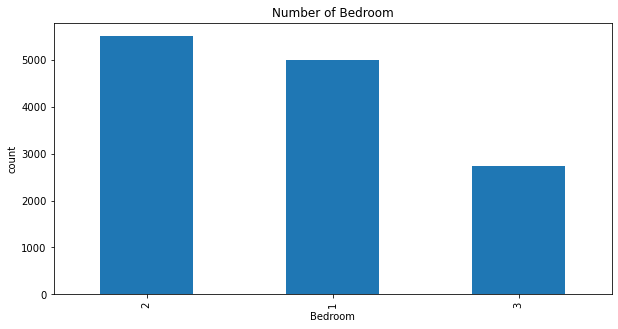

In [32]:
plt.figure(figsize=(10,5))
df4['BHK'].value_counts().plot(kind = 'bar')
plt.title('Number of Bedroom')
plt.xlabel("Bedroom")
plt.ylabel('count')
plt.show()

### Number of Bathroom and Number of Bedroom

C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:2015: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x720 with 0 Axes>

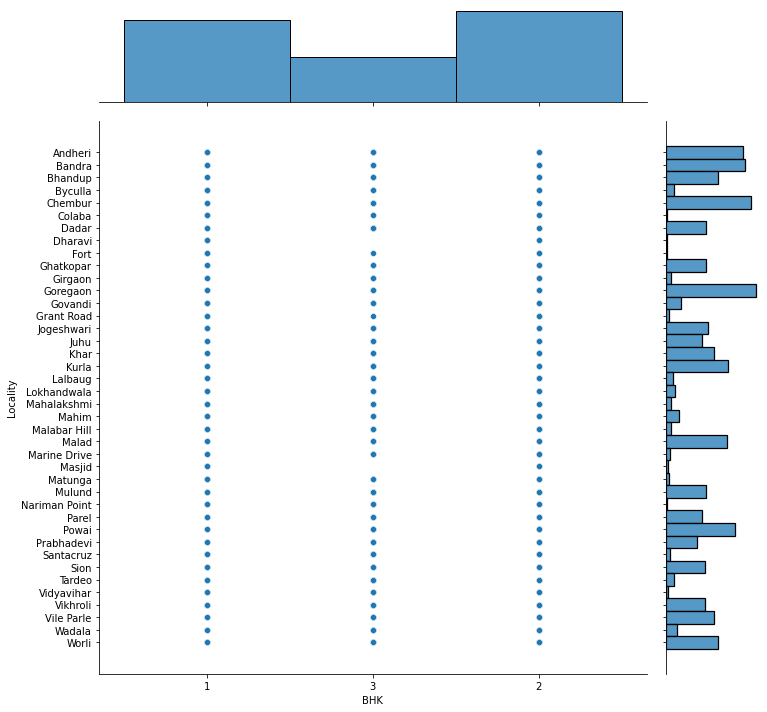

In [33]:
plt.figure(figsize=(10,10))
sns.jointplot(x=df4.BHK, y=df4.Locality, size=10)
#plt.title('Number of Bedroom')
plt.xlabel("Bedroom")
plt.ylabel('Locality')
plt.show()

### Common Factors Affecting the Rent Price

#### #1 Build up Area (sq.ft)

In [34]:
df4.shape

(13239, 9)

In [35]:
# Removing extreme high rent

df5 = df4[df4['Rent_per_Month']<600000]
df5 = df5[df5['Build_up_area (sq.ft)']<4000]
df5.shape

(13236, 9)

Text(0.5, 1.05, 'Rent/Month Vs Build-up Area')

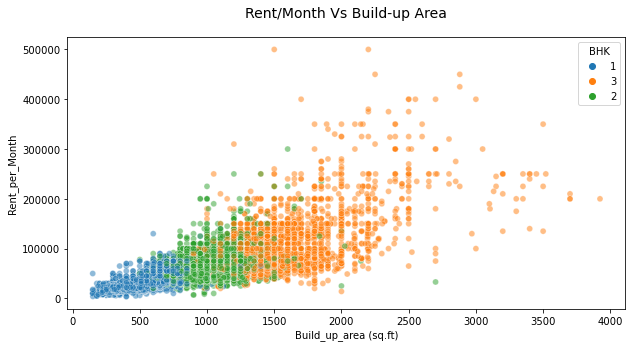

In [36]:
plt.figure(figsize=(10,5))
scatter1 = sns.scatterplot(x='Build_up_area (sq.ft)', y='Rent_per_Month', data=df5, hue='BHK', alpha=0.5)
scatter1.set_title('Rent/Month Vs Build-up Area', fontsize = 14, y =1.05)

#### #2 Bathrooms

In [37]:
# Removing extreme high value

df6 = df5[df5['Rent_per_Month']<600000]

df6['Bathrooms'] = df6['Bathrooms'].astype(int)
df6 = df6[df6['Bathrooms']<7]

Text(0.5, 1.05, 'Rent/Month Vs Bathrooms')

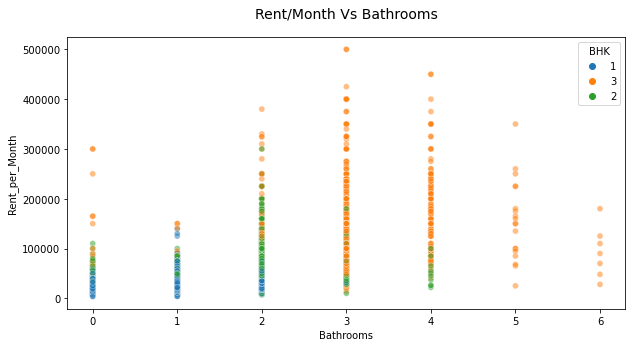

In [38]:
plt.figure(figsize=(10,5))
scatter2 = sns.scatterplot(x='Bathrooms', y='Rent_per_Month', data=df6, hue='BHK', alpha=0.5)
scatter2.set_title('Rent/Month Vs Bathrooms', fontsize = 14, y =1.05)

#### #3 Parking

Text(0.5, 1.05, 'Rent/Month Vs Parking')

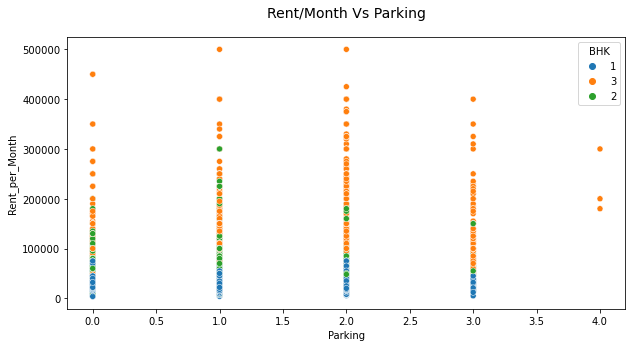

In [39]:
plt.figure(figsize=(10,5))
scatter3 = sns.scatterplot(x='Parking', y='Rent_per_Month', data=df6, hue='BHK')
scatter3.set_title('Rent/Month Vs Parking', fontsize = 14, y =1.05)

#### #4 Furnishing

Text(0.5, 1.05, 'Rent/Month Vs Furnishing')

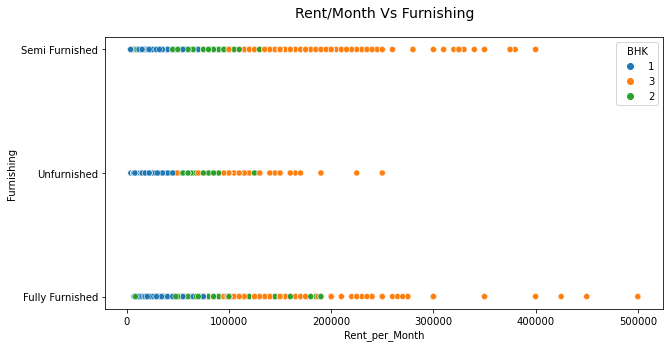

In [40]:
plt.figure(figsize=(10,5))
scatter4 = sns.scatterplot(y='Furnishing', x='Rent_per_Month', data=df6, hue='BHK')
scatter4.set_title('Rent/Month Vs Furnishing', fontsize = 14, y =1.05)

# Exploring Areaswise

<ipython-input-42-9c2011078030>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_locality_1 = df6.groupby(['Locality'], sort=True)['Rent_per_Month', 'Bathrooms', 'Balcony', 'Parking', 'Build_up_area (sq.ft)', 'BHK'].mean().round(2)


Text(0, 0.5, 'Rent_per_Month')

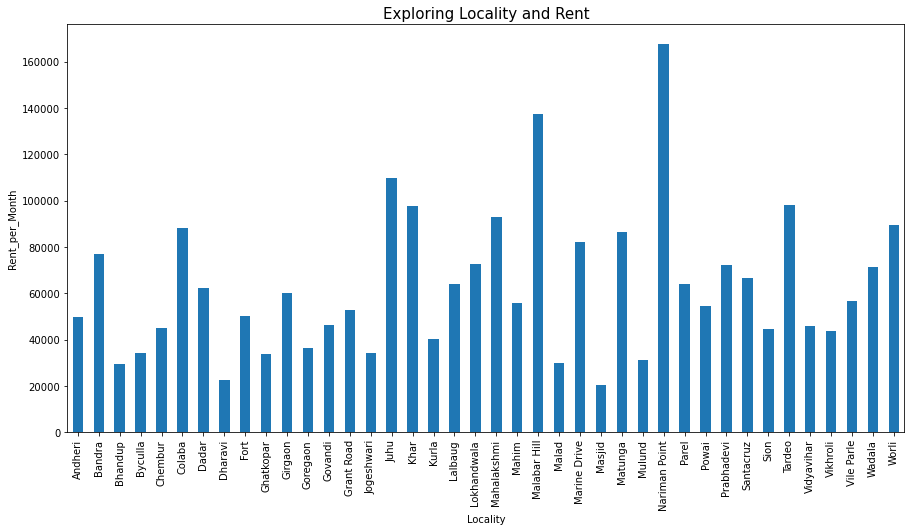

In [42]:
df_locality_1 = df6.groupby(['Locality'], sort=True)['Rent_per_Month', 'Bathrooms', 'Balcony', 'Parking', 'Build_up_area (sq.ft)', 'BHK'].mean().round(2)

plt.figure(figsize=(15,7.5))

df_locality_1['Rent_per_Month'].plot(kind="bar", title="test")

plt.title("Exploring Locality and Rent", fontsize=15)
plt.xlabel("Locality")
plt.ylabel("Rent_per_Month")


## 1. Andheri

In [41]:
df_locality = df6.groupby(['Locality'], sort=True)
df_locality.max()

,Rent_per_Month,Furnishing,Bathrooms,Balcony,Parking,Build_up_area (sq.ft),Carpet_area (sq.ft),BHK
Locality,,,,,,,,
Andheri,155000,Unfurnished,4,5,3.0,2322,1935,3
Bandra,500000,Unfurnished,5,5,3.0,2800,2200,3
Bhandup,70000,Unfurnished,4,4,3.0,2100,1800,3
Byculla,90000,Unfurnished,4,5,3.0,1600,1200,3
Chembur,128000,Unfurnished,3,4,3.0,2500,1450,3
Colaba,200000,Unfurnished,4,2,1.0,1615,1400,3
Dadar,245000,Unfurnished,4,6,3.0,2500,1834,3
Dharavi,42000,Unfurnished,2,2,3.0,1050,750,2
Fort,170000,Unfurnished,4,1,1.0,1280,1080,3


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Build_up_area (sq.ft)', ylabel='Rent_per_Month'>

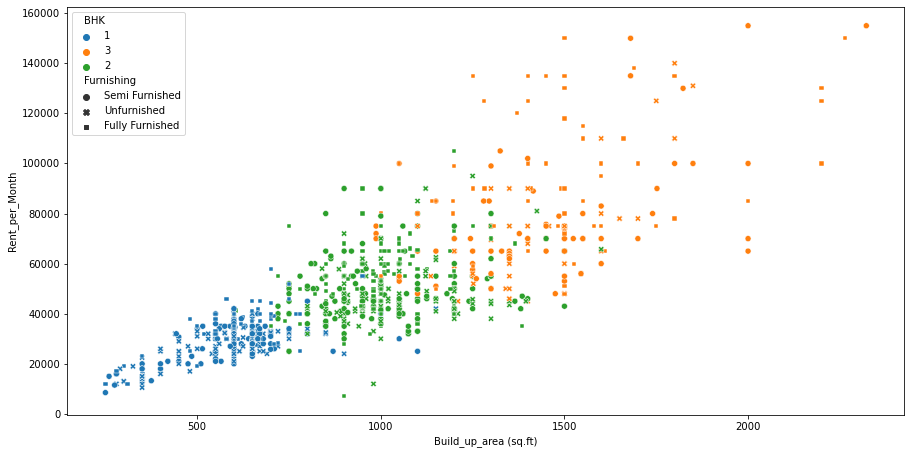

In [43]:
df_andheri = df_locality.get_group('Andheri')

plt.figure(figsize=(15,7.5))
sns.scatterplot('Build_up_area (sq.ft)','Rent_per_Month', data=df_andheri, hue='BHK', style='Furnishing')

## 2. Bandra

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.05, 'Rent/Month Vs Build-up Area')

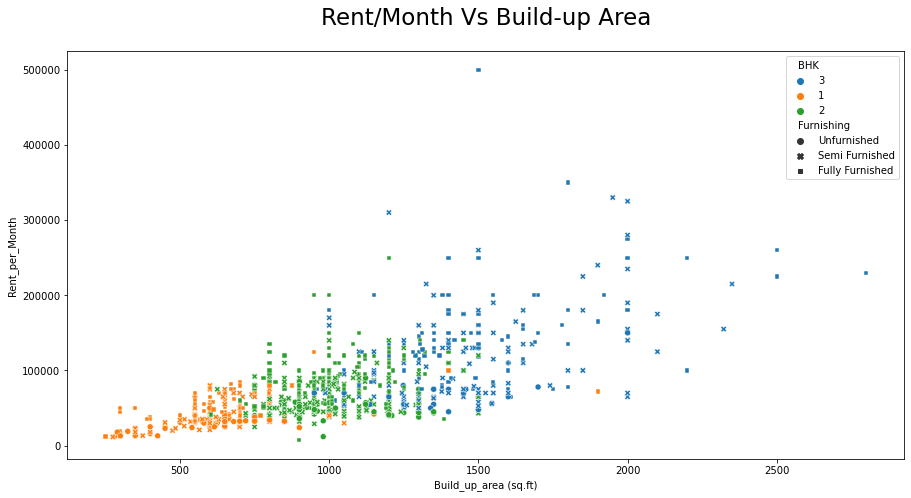

In [44]:
df_Bandra = df_locality.get_group('Bandra')

plt.figure(figsize=(15,7.5))
scatter = sns.scatterplot('Build_up_area (sq.ft)','Rent_per_Month', data=df_Bandra, hue='BHK', 
                          style='Furnishing', legend= 'full')
scatter.set_title('Rent/Month Vs Build-up Area', fontsize = 23, y =1.05)

In [45]:
df6.head()

,Locality,Rent_per_Month,Furnishing,Bathrooms,Balcony,Parking,Build_up_area (sq.ft),Carpet_area (sq.ft),BHK
0,Andheri,20000,Semi Furnished,1,0,0.0,350,250,1
1,Andheri,100000,Semi Furnished,3,1,2.0,1850,1400,3
2,Andheri,45000,Semi Furnished,2,4,1.0,1240,850,2
3,Andheri,31500,Unfurnished,2,0,1.0,650,425,1
4,Andheri,44000,Unfurnished,2,3,1.0,1250,800,2


In [46]:
dumy = pd.get_dummies(df6.Locality)
dumy.head()

,Andheri,Bandra,Bhandup,Byculla,Chembur,Colaba,Dadar,Dharavi,Fort,Ghatkopar,...,Powai,Prabhadevi,Santacruz,Sion,Tardeo,Vidyavihar,Vikhroli,Vile Parle,Wadala,Worli
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
df7 = pd.concat([df6, dumy.drop('Colaba', axis='columns')], axis='columns')
df7.head()

,Locality,Rent_per_Month,Furnishing,Bathrooms,Balcony,Parking,Build_up_area (sq.ft),Carpet_area (sq.ft),BHK,Andheri,...,Powai,Prabhadevi,Santacruz,Sion,Tardeo,Vidyavihar,Vikhroli,Vile Parle,Wadala,Worli
0,Andheri,20000,Semi Furnished,1,0,0.0,350,250,1,1,...,0,0,0,0,0,0,0,0,0,0
1,Andheri,100000,Semi Furnished,3,1,2.0,1850,1400,3,1,...,0,0,0,0,0,0,0,0,0,0
2,Andheri,45000,Semi Furnished,2,4,1.0,1240,850,2,1,...,0,0,0,0,0,0,0,0,0,0
3,Andheri,31500,Unfurnished,2,0,1.0,650,425,1,1,...,0,0,0,0,0,0,0,0,0,0
4,Andheri,44000,Unfurnished,2,3,1.0,1250,800,2,1,...,0,0,0,0,0,0,0,0,0,0


In [48]:
dumy1 = pd.get_dummies(df7.Furnishing)
dumy1.head()

,Fully Furnished,Semi Furnished,Unfurnished
0,0,1,0
1,0,1,0
2,0,1,0
3,0,0,1
4,0,0,1


In [49]:
df8 = pd.concat([df7, dumy1.drop('Unfurnished', axis='columns')], axis='columns')
df8.head()

,Locality,Rent_per_Month,Furnishing,Bathrooms,Balcony,Parking,Build_up_area (sq.ft),Carpet_area (sq.ft),BHK,Andheri,...,Santacruz,Sion,Tardeo,Vidyavihar,Vikhroli,Vile Parle,Wadala,Worli,Fully Furnished,Semi Furnished
0,Andheri,20000,Semi Furnished,1,0,0.0,350,250,1,1,...,0,0,0,0,0,0,0,0,0,1
1,Andheri,100000,Semi Furnished,3,1,2.0,1850,1400,3,1,...,0,0,0,0,0,0,0,0,0,1
2,Andheri,45000,Semi Furnished,2,4,1.0,1240,850,2,1,...,0,0,0,0,0,0,0,0,0,1
3,Andheri,31500,Unfurnished,2,0,1.0,650,425,1,1,...,0,0,0,0,0,0,0,0,0,0
4,Andheri,44000,Unfurnished,2,3,1.0,1250,800,2,1,...,0,0,0,0,0,0,0,0,0,0


In [50]:
df9 = df8.drop(['Locality', 'Furnishing'], axis=1)
df9.head()

,Rent_per_Month,Bathrooms,Balcony,Parking,Build_up_area (sq.ft),Carpet_area (sq.ft),BHK,Andheri,Bandra,Bhandup,...,Santacruz,Sion,Tardeo,Vidyavihar,Vikhroli,Vile Parle,Wadala,Worli,Fully Furnished,Semi Furnished
0,20000,1,0,0.0,350,250,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,100000,3,1,2.0,1850,1400,3,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,45000,2,4,1.0,1240,850,2,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,31500,2,0,1.0,650,425,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,44000,2,3,1.0,1250,800,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0


# Linear Regression

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X= df9.drop(['Rent_per_Month'],axis=1)
Y=df9['Rent_per_Month']

In [53]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=1)

In [54]:
from sklearn.linear_model import LinearRegression

In [55]:
reg=LinearRegression()

In [56]:
reg.fit(x_train, y_train)

LinearRegression()

In [57]:
reg.score(x_test, y_test)

0.7406760406999787

In [58]:
#  K Fold cross validation to measure accuracy of our LinearRegression model

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [59]:
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=1)

cross_val_score(LinearRegression(), X, Y, cv=cv)


array([0.74067604, 0.74125756, 0.71556455, 0.75054874, 0.74695673])

In Majority of the split we get result around 0.74

In [60]:
X.columns

Index(['Bathrooms', 'Balcony', 'Parking', 'Build_up_area (sq.ft)',
       'Carpet_area (sq.ft)', 'BHK', 'Andheri', 'Bandra', 'Bhandup', 'Byculla',
       'Chembur', 'Dadar', 'Dharavi', 'Fort', 'Ghatkopar', 'Girgaon',
       'Goregaon', 'Govandi', 'Grant Road', 'Jogeshwari', 'Juhu', 'Khar',
       'Kurla', 'Lalbaug', 'Lokhandwala', 'Mahalakshmi', 'Mahim',
       'Malabar Hill', 'Malad', 'Marine Drive', 'Masjid', 'Matunga', 'Mulund',
       'Nariman Point', 'Parel', 'Powai', 'Prabhadevi', 'Santacruz', 'Sion',
       'Tardeo', 'Vidyavihar', 'Vikhroli', 'Vile Parle', 'Wadala', 'Worli',
       'Fully Furnished', 'Semi Furnished'],
      dtype='object')

In [61]:
# we create a function to predict the rent  

def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[3] = sqft
    x[0] = bath
    x[5] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return reg.predict([x])[0]

In [62]:
#np.where(X.columns =='Andheri')[0][0]

np.where(X.columns=='Santacruz')[0][0]

# This method will just give us the index number of the columns.

37

In [68]:
predict_price('Masjid',1000, 1, 1)


4459.693910042959

In [69]:
predict_price('Bandra',1000, 2, 2)

10243.420191149278

In [71]:
predict_price('Masjid',1000, 2, 1)


6941.336076194511